# Importando as bibliotecas: Pandas e Numpy



In [2]:
import pandas as pd
import numpy as np

# Importando biblioteca de visualização dos dados:

In [3]:
import matplotlib.pyplot as plt

# Baixando o dataset Medical Cost Personal Datasets
Esse dataset relaciona os dados:

| idade | sexo | imc | número de filhos | indicador de fumante | região do usuário | valor do seguro de saúde |

em uma amostra de usuário de planos de saúde

In [4]:
!gdown '16WlPQDl2sQLaEWzH-nix8lF8TPjsfP97'

Downloading...
From: https://drive.google.com/uc?id=16WlPQDl2sQLaEWzH-nix8lF8TPjsfP97
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 65.4MB/s]


# Carregando o dataset usando a biblioteca Pandas

In [5]:
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


# Algumas análises estatísticas

## Probabilidade de children >= 1 dado que smoker = 'yes' já ocorreu.

In [ ]:
# Filtrando as linhas cuja coluna smoker é yes
smokers = df[df['smoker'] == 'yes']

# Quantidade de linhas cuja coluna children é >=1 e smoker=yes
smokers_with_children = smokers[smokers['children'] >= 1].shape[0]

# Quantidade de linhas cuja coluna smoker = yes
total_smokers = smokers.shape[0]

# Calculando a proporção
proportion = smokers_with_children / total_smokers
print(f'Probabilidade p(children >= 1 | smoker = \'yes\') = {proportion:.2f}')

Probabilidade p(children >= 1 | smoker = 'yes') = 0.58 


## Agora pela regra de **Bayes**

In [ ]:
# Quantidade de linhas no dataset
total_lines = df.shape[0]

# Quantidade de linhas cuja coluna smoker é yes
smokers = df[df['smoker'] == 'yes'].shape[0]

# Quantidade de linhas cuja coluna children é >= 1
children_table = df[df['children'] >= 1]
children = children_table.shape[0]

# Quantidade de linhas cuja coluna smoker é 'yes' na tabela children_table
smokers_in_children_table = children_table[children_table['smoker'] == 'yes'].shape[0]

# p(smoke = 'yes' | children >= 1) = smokers_in_children_table/children
# p(children >= 1) = children/total_lines
# p(smoke = 'yes') = smokers/total_lines
# p(children >= 1 | smoke = 'yes') = p(smoke = 'yes' | children >= 1) * p(children >= 1) / p(smoke = 'yes')
bayes = (smokers_in_children_table/children)*(children/total_lines)/(smokers/total_lines)
print(f'Probabilidade p(children >= 1 | smoke = \'yes\') = {bayes:.2f}')


Probabilidade p(children >= 1 | smoke = 'yes') = 0.58


# AGORA É COM VOCÊ! TENTE O SEGUINTE EXERCÍCIO

### QUESTÃO 1: Dado que os usuários do plano de saúde são fumantes, qual a probabilidade dele ser homem?

In [7]:
# Total de dados do dataset:

Total = len(df)
print('Total de pessoas no dataset: ', Total)

Total de pessoas no dataset:  1338


In [8]:
# Total de fumantes:
fumantes = df[df['smoker'] == 'yes']

valor_fumantes  = len(fumantes)
print('Fumantes: ', valor_fumantes)

# Homens:
homens = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')]

valor_homens = len(homens)
print('Homens: ', valor_homens)

# Probabilidade:

probabilidade = valor_homens / valor_fumantes;
print(f'A probabilidade de ser um homem fumante é: {probabilidade:.2f} %.')

Fumantes:  274
Homens:  159
A probabilidade de ser um homem fumante é: 0.58 %.


### QUESTÃO 2: Dado que os usuários do plano de saúde pagam acima de $20000, qual a probabilidade dele ser mulher?

Quantidade de usuários do plano que pagam acima de R$20.000:  273
A quantidade de mulheres que pagam acima de R$20.000 é: 115
A probabilidade dele ser mulher: 0.42 %




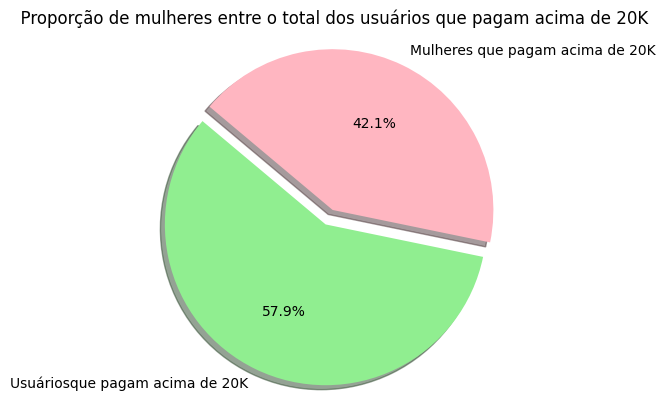

In [9]:
# Pagam acima de 20.000
usuarios_acima = df[df['charges']  >= 20000]

valor_usuarios = len(usuarios_acima)
print('Quantidade de usuários do plano que pagam acima de R$20.000: ', valor_usuarios)


# Pagam acima de 20.000 e são mulheres
usuarios_mul = df[(df['charges']  >= 20000) & (df['sex']  == 'female')]
print(f'A quantidade de mulheres que pagam acima de R$20.000 é: {len(usuarios_mul)}')

prob = len(usuarios_mul) / valor_usuarios;
print(f'A probabilidade dele ser mulher: {prob:.2f} %');

print("\n");

# Dados para o gráfico de pizza
labels = ['Usuáriosque pagam acima de 20K', 'Mulheres que pagam acima de 20K']
sizes = [valor_usuarios - len(usuarios_mul), len(usuarios_mul)]
colors = ['lightgreen', 'lightpink']
explode = (0, 0.1)  # Destaque na fatia das mulheres

# Criando o gráfico de pizza
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Assegura que o gráfico seja um círculo
plt.title('  Proporção de mulheres entre o total dos usuários que pagam acima de 20K')
plt.show()

### QUESTÃO 3: Dado que os usuários do plano de saúde são mulheres e tem filhos, qual a probabilidade de ser fumante?

Quantidade de usuários do plano de saúde que são mulheres e tem filhos:  373
Fumantes mulheres com filhos:  62
Dado que os usuários do plano de saúde são mulheres e tem filhos, a probabilidade de ser fumante é 0.17 %'




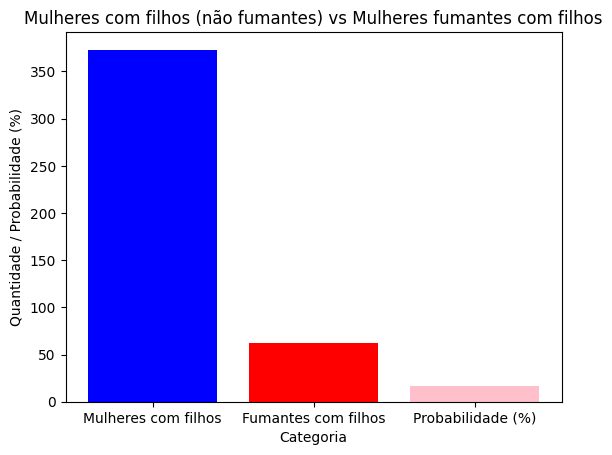

In [10]:
# Mulheres com filhos:
mulheres_filhos = df[(df['sex'] == 'female') & (df['children'] >= 1)]

valores = len(mulheres_filhos)
print('Quantidade de usuários do plano de saúde que são mulheres e tem filhos: ', valores)

# Fumantes:
fumantes_com_filhos = df[(df['sex'] == 'female') & (df['children'] >= 1) & (df['smoker'] == 'yes')]

valor_fumantes  = len(fumantes_com_filhos )
print('Fumantes mulheres com filhos: ', valor_fumantes)

p = valor_fumantes / valores;

print(f"Dado que os usuários do plano de saúde são mulheres e tem filhos, a probabilidade de ser fumante é {p:.2f} %'")
print("\n");

# gráfico de barras
categorias = ['Mulheres com filhos', 'Fumantes com filhos', 'Probabilidade (%)']
quantidades = [valores, valor_fumantes, p * 100]  # Multiplicando p por 100 para representar como porcentagem

plt.bar(categorias, quantidades, color=['blue', 'red', 'pink'])
plt.xlabel('Categoria')
plt.ylabel('Quantidade / Probabilidade (%)')
plt.title('Mulheres com filhos (não fumantes) vs Mulheres fumantes com filhos')
plt.show()


### QUESTÃO 4: Dado que os usuários do plano de saúde tem imc (bmi) acima de 40, qual a probabilidade de ser mulher?

Total de usuários do plano de saúde tem imc (bmi) acima de 40: 91 pessoas.
Total de mulheres com bmi alto: 40 pessoas.
A probabilidade de um usuário ter o bmi alto e ser mulher é de: 0.44 %.


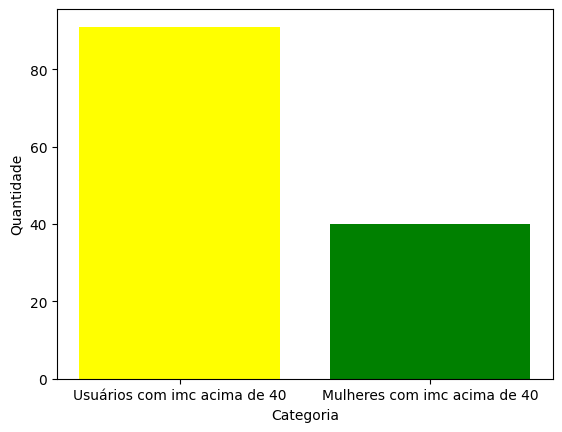

In [11]:
# usuários do plano de saúde tem imc (bmi) acima de 40

bmi_alto = df[df['bmi'] > 40]

valor_bmi_alto = len(bmi_alto)
print(f'Total de usuários do plano de saúde tem imc (bmi) acima de 40: {valor_bmi_alto} pessoas.')

mulher_bmi_alto = df[(df['bmi'] > 40) & (df['sex'] == 'female')]

valor_mulher_bmialto = len(mulher_bmi_alto)
print(f"Total de mulheres com bmi alto: {valor_mulher_bmialto} pessoas.")

prob3 = valor_mulher_bmialto/valor_bmi_alto;
print(f"A probabilidade de um usuário ter o bmi alto e ser mulher é de: {prob3:.2} %.")

# gráfico de barras
categorias = ['Usuários com imc acima de 40', 'Mulheres com imc acima de 40']
quantidades = [valor_bmi_alto, valor_mulher_bmialto]

plt.bar(categorias, quantidades, color=['yellow', 'green'])
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.show()


### QUESTÃO 5: Dado que os usuários do plano de saúde tem mais de 60 anos, qual a probabilidade deles terem imc acima de 30?

Quantidade de usuários com mais de 60 anos: 91 pessoas.
Quantidade de usuários com mais de 60 anos e IMC acima de 30: 63 pessoas.
A probabilidade de um usuário com mais de 60 anos ter IMC acima de 30 é: 69.23%


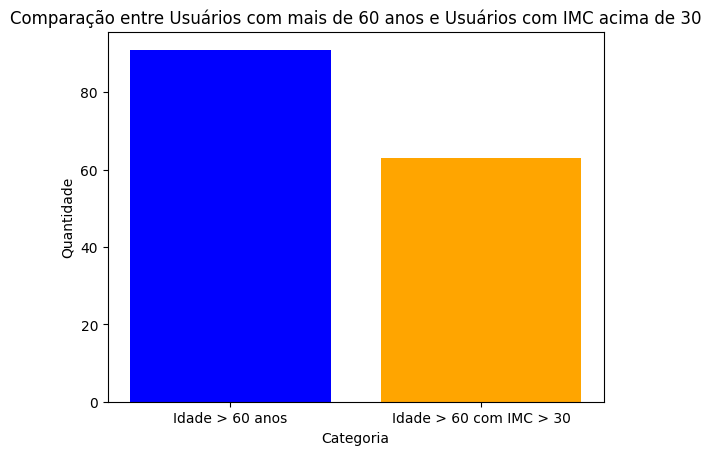

In [17]:
# + de 60
usuarios_mais = df[df['age'] > 60]

# Quantidade de usuários com mais de 60 anos
total_usuarios_mais = len(usuarios_mais)
print(f'Quantidade de usuários com mais de 60 anos: {total_usuarios_mais} pessoas.')

# Usuários com mais de 60 anos e IMC acima de 30
usuariosimc_30 = usuarios_mais[usuarios_mais['bmi'] > 30]

# Quantidade de usuários com mais de 60 anos e IMC acima de 30
total_usuariosimc_30 = len(usuariosimc_30)
print(f'Quantidade de usuários com mais de 60 anos e IMC acima de 30: {total_usuariosimc_30} pessoas.')

# Probabilidade de ter IMC acima de 30 dado que tem mais de 60 anos
prob_imc_acima_30 = total_usuariosimc_30 / total_usuarios_mais
print(f'A probabilidade de um usuário com mais de 60 anos ter IMC acima de 30 é: {prob_imc_acima_30:.2%}')

# Dados para o gráfico de barras
categorias = ['Idade > 60 anos', 'Idade > 60 com IMC > 30']
quantidades = [total_usuarios_mais, total_usuariosimc_30]

plt.bar(categorias, quantidades, color=['blue', 'orange'])
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.title('Comparação entre Usuários com mais de 60 anos e Usuários com IMC acima de 30')
plt.show()

